# KNN Algorithm

# Importing dependencies

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Loading our data

In [76]:
# add the link of your dataset here:
df = pd.read_csv('Credit Card Customer Data.csv')

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Data Preprocessing

Removing null values

In [77]:
df.shape

(660, 7)

In [78]:
df.isnull().sum(axis = 0)

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [79]:
df = df.dropna()
df.isnull().sum(axis = 0)

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [80]:
df.shape

(660, 7)

In [81]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Splitting the data into training and testing data

In [82]:
y = df['Total_visits_bank']
X = df.drop('Total_visits_bank', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.3, random_state = 0)



# How to choose the value of k for KNN Algorithm?

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better. It is recommended to choose an odd value for k to avoid ties in classification

Here we've tried a range of K values.
Feel free to try the range you want and see what's the best value.

In [83]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, y_train)

	training_score = clf.score(X_train, y_train)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]



In [84]:
for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.6298701298701299, 0.20707070707070707]
3 : [0.5692640692640693, 0.18686868686868688]
4 : [0.5, 0.20707070707070707]
5 : [0.5043290043290043, 0.23232323232323232]
6 : [0.47619047619047616, 0.21717171717171718]
7 : [0.461038961038961, 0.23232323232323232]
8 : [0.44372294372294374, 0.20707070707070707]
9 : [0.43506493506493504, 0.22727272727272727]
10 : [0.4264069264069264, 0.25252525252525254]
11 : [0.44155844155844154, 0.21717171717171718]
12 : [0.40476190476190477, 0.21717171717171718]
13 : [0.3961038961038961, 0.23232323232323232]
14 : [0.37662337662337664, 0.21717171717171718]
15 : [0.3961038961038961, 0.23232323232323232]
16 : [0.37445887445887444, 0.24242424242424243]
17 : [0.37662337662337664, 0.25757575757575757]
18 : [0.36796536796536794, 0.2727272727272727]
19 : [0.36363636363636365, 0.25252525252525254]
20 : [0.3463203463203463, 0.2474747474747475]


In [85]:
# train score.
plt.plot(K, training, marker='o', color='k')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.

plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score

plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')
plt.show()

# K-means Algorithm

# Importing dependencies

In [ ]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# add the link of your dataset here:

df=pd.read_json('class info.json')

In [ ]:

# Extract the sentence only
sentence = df.path

print(sentence)

0                                    Europe/Base/Arrow_EU
1                         Europe/NonOriginal/Barbarian_EU
2                                 Europe/Base/Bookcase_EU
3                             Europe/Base/ChaosWarrior_EU
4                                 Europe/Base/Cupboard_EU
                              ...                        
2401      Multicolor/Anderas/Color Square_pink_dark_white
2402     Multicolor/Anderas/Color Square_pink_light_white
2403    Multicolor/Anderas/Color Square_pink_medium_white
2404                   Multicolor/Anderas/Door_blue_light
2405                         Multicolor/Anderas/Door_grey
Name: path, Length: 1191, dtype: object


In [ ]:

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')


# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentence)

In [ ]:
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=4)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [ ]:
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
				max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [ ]:

# create a dataframe to store the results
results = pd.DataFrame()

results['document'] = sentence
results['cluster'] = kmeans.labels_

results.head()

,document,cluster
0,Europe/Base/Arrow_EU,0
1,Europe/NonOriginal/Barbarian_EU,0
2,Europe/Base/Bookcase_EU,0
3,Europe/Base/ChaosWarrior_EU,0
4,Europe/Base/Cupboard_EU,0


In [ ]:
# print random 25 samples
print(results.sample(5))

                                              document  cluster
118   Europe/NonOriginal/TheFrozenHorror.IceTunnelA_EU        0
1098            Europe/MiniIcons/MiniIcons.Shackles_EU        1
2164                      Europe/YeOldeInn/Minotaur_EU        0
159                    Europe/Elessao/Elessao.Druid_EU        0
448       Europe/HeroQuest.Es/HeroQuest.Es.OpenTomb_EU        0


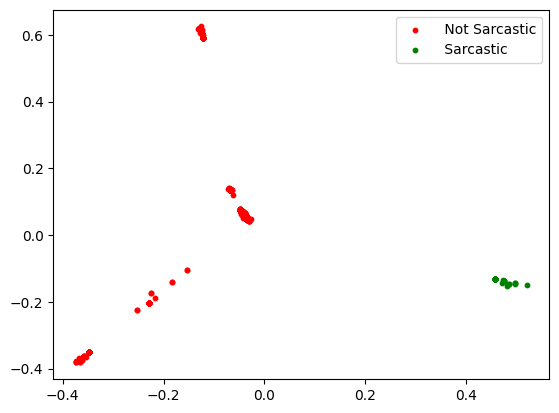

In [ ]:
# plot the results
colors = ['red', 'green']
cluster = ['a','b']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()
